<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S05_Data_Preprocessing/S05_InClass_Exercises_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S5 - In-Class/After-Class Exercise: Data Exploration,  Preprocessing and SCM examples (Solution)
---
## Instructions:
For each exercise, you have a code cell for the response underneath it, where you should write your answer between the lines containing `### start your code here ###` and `### end your code here ###`. Your code can contain one or more lines and you can execute this cell in order to complete the exercise. To execute the cell, you can type `Shift+Enter` or press the play button in the toolbar above. Your results will appear right below this response cell.


### Importing data
In this exercise, we will explore some adapted data set which provides information on the number of patients waiting, and length of time waiting at the end of each quarter, for Inpatient and Day Case admissions at Health and Social Care (HSC) Trusts in Northern Ireland. Data are presented by HSC Trust, specialty, programme of care and time band. The original data can be accessed at [this page](https://data.world/datagov-uk/a593a0b3-29ef-48f2-b2b2-ceb83d841a3c).

This is a description of the columns of our adapted data in the file `day-case-waiting-times.csv`.

| VARIABLE NAME | DESCRIPTION | 
|:----|:----|
|quarter_ending| report date for each quarter|
|HSC_trust| Health and Social Care (HSC) Trusts|
|specialty| specialty of the HSC (e.g., Urology, General Surgery, Plastic Surgery, etc.) |
|program| program of care (e.g, mental health, acute services)|
|0-6_weeks|number of patients who wait for a period between (0, 6] weeks in the corresponding quarter|
|>6-13_weeks|number of patients who wait for a period between (6, 13] weeks in the corresponding quarter|
|>13-21_weeks|number of patients who wait for a period between (13, 21] weeks in the corresponding quarter|
|>21-26_weeks|number of patients who wait for a period between (21, 26] weeks in the corresponding quarter|
|>26-52_weeks|number of patients who wait for a period between (26, 52] weeks in the corresponding quarter|
|>52_weeks|number of patients who wait for a period greater than 52 weeks in the corresponding quarter|
|>26-30_weeks|number of patients who wait for a period between (26, 30] weeks in the corresponding quarter|

Import the data file `day-case-waiting-times.csv` into a `DataFrame` named `df_WT`. Display the first 5 rows of your `DataFrame`.

**Hint**: you can use the `pandas.read_csv()` funtion.

In [15]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S05_Data_Preprocessing/day-case-waiting-times.csv'
df_WT = pd.read_csv(url)  # reading data file into a DataFrame
df_WT.head()


,quarter_ending,HSC_trust,specialty,program,0-6_weeks,>6-13_weeks,>13-21_weeks,>21-26_weeks,>26-52_weeks,>52_weeks,>26-30_weeks
0,30-Jun-07,Belfast,General Surgery,Acute Services,309,218,138,6,0,NaN,--
1,30-Jun-07,Belfast,Urology,Acute Services,483,301,116,3,0,NaN,--
2,30-Jun-07,Belfast,T & O Surgery,Acute Services,158,211,110,36,0,NaN,--
3,30-Jun-07,Belfast,ENT,Acute Services,121,159,72,1,0,NaN,--
4,30-Jun-07,Belfast,Ophthalmology,Acute Services,905,846,405,19,0,NaN,--


---

## Preprocessing Data and Missing Values
### Exercise 1: Changing the data types of columns
Take a look at the type of data in your `DataFrame`. The column `quarter_ending` should be of type `datatime64`, and all the columns from `0-6_weeks` to `>26-30_weeks` should be numeric, as they represent the number of patients whose waiting times were within the corresponding intervals.

Are your columns of the correct type? If not, convert the data into the correct format. 
**Hint1:** You can use the functions `pandas.to_numeric()`, `pandas.to_datetime`, and/or  `DataFrame.astype()`.

**Hint2:** we can make sure that (i) the non-numerical value will be set as `NaN` by using the argument `errors = 'coerce'`, and (ii) the numeric type is float by using the argument `downcast='float'` in `pandas.to_numeric(column_series, errors = 'coerce', downcast='float')`

More details can be found here [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html)

In [16]:
df_WT.dtypes

quarter_ending    object
HSC_trust         object
specialty         object
program           object
0-6_weeks         object
>6-13_weeks       object
>13-21_weeks      object
>21-26_weeks       int64
>26-52_weeks      object
>52_weeks         object
>26-30_weeks      object
dtype: object

In [17]:
### start your code here ###
df_WT['quarter_ending'] = pd.to_datetime(df_WT['quarter_ending'])

for col in df_WT.columns[-7:]:
  df_WT[col] = pd.to_numeric(df_WT[col], errors='coerce', downcast='float')

df_WT.dtypes
### end your code here ###

quarter_ending    datetime64[ns]
HSC_trust                 object
specialty                 object
program                   object
0-6_weeks                float32
>6-13_weeks              float32
>13-21_weeks             float32
>21-26_weeks             float32
>26-52_weeks             float32
>52_weeks                float32
>26-30_weeks             float32
dtype: object

### Exercise 2:  Missing values
Take a look at the missing values in your `DataFrame`. Implement a line of code which shows the total number of missing values in each column.

In [18]:
df_WT.isna().sum()

quarter_ending       0
HSC_trust            0
specialty            0
program              0
0-6_weeks           18
>6-13_weeks         17
>13-21_weeks         5
>21-26_weeks         0
>26-52_weeks      2574
>52_weeks         3194
>26-30_weeks      3693
dtype: int64

Let's assume that the missing values can appear when data is not available. Thus, in this case of having missing values,  the number of patients with waiting times within any of the interval specified by the columns of our `DataFrame` is equal to 0. We can replace the missing numeric values with 0.

**Hint:** you can use the function `DataFrame.fillna()` to replace missing values of the last 7 columns. Make sure the changes are applied/saved to your `DataFrame`.

In [19]:
### start your code here ###
df_WT[df_WT.columns[-7:]] = df_WT[df_WT.columns[-7:]].fillna(0)
df_WT.isna().sum()
df_WT
###  end your code here ###

,quarter_ending,HSC_trust,specialty,program,0-6_weeks,>6-13_weeks,>13-21_weeks,>21-26_weeks,>26-52_weeks,>52_weeks,>26-30_weeks
0,2007-06-30,Belfast,General Surgery,Acute Services,309.0,218.0,138.0,6.0,0.0,0.0,0.0
1,2007-06-30,Belfast,Urology,Acute Services,483.0,301.0,116.0,3.0,0.0,0.0,0.0
2,2007-06-30,Belfast,T & O Surgery,Acute Services,158.0,211.0,110.0,36.0,0.0,0.0,0.0
3,2007-06-30,Belfast,ENT,Acute Services,121.0,159.0,72.0,1.0,0.0,0.0,0.0
4,2007-06-30,Belfast,Ophthalmology,Acute Services,905.0,846.0,405.0,19.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4394,2019-09-30,Western,Ophthalmology,Acute Services,418.0,392.0,438.0,246.0,1437.0,212.0,0.0
4395,2019-09-30,Western,Oral Surgery,Acute Services,116.0,60.0,58.0,19.0,151.0,94.0,0.0
4396,2019-09-30,Western,Pain Management,Acute Services,59.0,38.0,38.0,21.0,213.0,92.0,0.0
4397,2019-09-30,Western,T & O Surgery,Acute Services,164.0,92.0,90.0,67.0,986.0,693.0,0.0


### Exercise 3: Aggregating data 1
Execute the code block below. As you can see, the `DataFrame` has a column with the name `>26-52_weeks`, and another column named `>26-30_weeks`. As some data were recorded under one of these columns, thus

1.   we will use only the maximum value in these two columns and 
2.   put the resulting value in the column `>26-52_weeks` and
3.   remove the column `>26-30_weeks`.


**Hint:** you can use the function `DataFrame.drop(columns='...')` to remove the selected column. See this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [20]:
### start your code here ###
df_WT['>26-52_weeks'] = [max(df_WT.loc[i,'>26-52_weeks'], df_WT.loc[i,'>26-30_weeks']) for i in df_WT.index]
df_WT = df_WT.drop(columns='>26-30_weeks')   
df_WT
### end your code here ###

,quarter_ending,HSC_trust,specialty,program,0-6_weeks,>6-13_weeks,>13-21_weeks,>21-26_weeks,>26-52_weeks,>52_weeks
0,2007-06-30,Belfast,General Surgery,Acute Services,309.0,218.0,138.0,6.0,0.0,0.0
1,2007-06-30,Belfast,Urology,Acute Services,483.0,301.0,116.0,3.0,0.0,0.0
2,2007-06-30,Belfast,T & O Surgery,Acute Services,158.0,211.0,110.0,36.0,0.0,0.0
3,2007-06-30,Belfast,ENT,Acute Services,121.0,159.0,72.0,1.0,0.0,0.0
4,2007-06-30,Belfast,Ophthalmology,Acute Services,905.0,846.0,405.0,19.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4394,2019-09-30,Western,Ophthalmology,Acute Services,418.0,392.0,438.0,246.0,1437.0,212.0
4395,2019-09-30,Western,Oral Surgery,Acute Services,116.0,60.0,58.0,19.0,151.0,94.0
4396,2019-09-30,Western,Pain Management,Acute Services,59.0,38.0,38.0,21.0,213.0,92.0
4397,2019-09-30,Western,T & O Surgery,Acute Services,164.0,92.0,90.0,67.0,986.0,693.0


### Exercise 4: Aggregating data 2
Compute the total number of patients and add this new piece of information as a new column in the `DataFrame` and assign the name `'total_patients'` to it. You can use the function `df.sum(axis = 1)` to sum based on the columns. Please make sure you sum only the last six columns containing the number of patients into this new column and plot a histogram of this column

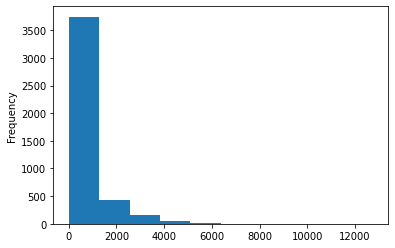

In [22]:
### start your code here ###
df_WT['total_patients'] = df_WT[df_WT.columns[-6:]].sum(axis = 1)
df_WT['total_patients'].plot(kind = 'hist')
### end your code here ###

## Data Transformation

### Exercise 5: Skewness
Please calculate the skewness of this new `total_patients` column where:
$Skewness = \frac{3(X_{mean}-X_{median})}{\sigma_X}$

**Hint:** you can make use of the `DataFrame`'s functions `DataFrame.mean(), `DataFrame.median()` and `DataFrame.std()` for your calculations.



skewness: 1.1449345378639113


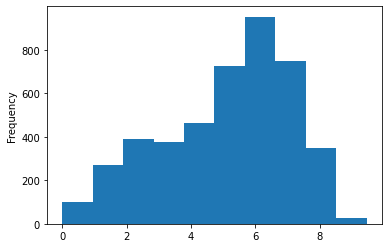

In [28]:
### start your code here ###
skew = 3*(df_WT['total_patients'].mean() - df_WT['total_patients'].median())/df_WT['total_patients'].std()
print("skewness:",skew)


### Exercise 6: log transformation
Please (i) tranform this `total_patients` column using a log transformation `log(x+1)` and assign it to a new column `log_total_patients` and (ii) plot a histogram of this new column

In [ ]:
### start your code here ###
import math
df_WT['log_total_patients'] = [math.log(x+1) for x in df_WT['total_patients']]
df_WT['log_total_patients'].plot(kind = 'hist')
### end your code here ###

### Exercise 7: Dummy Variables
A categorical variable should generally be encoded as **dummy variables** (a.k.a. indicator variables), each taking only one of two values (0 or 1; False or True) prior to being used in the predictive analysis.

Please use **dummy encoding** and create k-1 dummy variables.

This implies you will get $k-1$ = 3 dummy variables corresponding to the values in the variable `program`. You can check the values of the original categorical value by executing the cell below.

In [29]:
df_WT['program'].unique()

array(['Acute Services', 'Mental Health', 'Elderly Care',
       'Maternity & Child Health'], dtype=object)

**Hint1:** you can use of the `DataFrame` function `pd.get_dummies()`, which automatically  converts categorical variable into dummy/indicator variables. To perform dummy encoding, we can indicate the option `drop_first=True`. You can check [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) for more information. 

**Hint2:** to add the set of new columns, we can use the function `df1 = pd.concat([df1, df2], axis = 1)`. See this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) for more detail. 

In [ ]:
### start your code here ###
df_dummies = pd.get_dummies(df_WT['program'], drop_first=True)

# concatenating the original df_WT with df_dummy 
df_WT = pd.concat([df_WT, df_dummies], axis=1) 
df_WT.head()
### end your code here ###

,quarter_ending,HSC_trust,specialty,program,0-6_weeks,>6-13_weeks,>13-21_weeks,>21-26_weeks,>26-52_weeks,>52_weeks,...,norm-0-6_weeks,norm->6-13_weeks,norm->13-21_weeks,norm->21-26_weeks,norm->26-52_weeks,norm->52_weeks,Acute Services,Elderly Care,Maternity & Child Health,Mental Health
0,2007-06-30,Belfast,General Surgery,Acute Services,309.0,218.0,138.0,6,0.0,0.0,...,0.766115,0.724861,0.631671,-0.325319,-0.161756,-0.184495,1,0,0,0
1,2007-06-30,Belfast,Urology,Acute Services,483.0,301.0,116.0,3,0.0,0.0,...,1.600883,1.264467,0.443486,-0.383305,-0.161756,-0.184495,1,0,0,0
2,2007-06-30,Belfast,T & O Surgery,Acute Services,158.0,211.0,110.0,36,0.0,0.0,...,0.041691,0.679352,0.392163,0.254542,-0.161756,-0.184495,1,0,0,0
3,2007-06-30,Belfast,ENT,Acute Services,121.0,159.0,72.0,1,0.0,0.0,...,-0.135817,0.341286,0.067116,-0.421962,-0.161756,-0.184495,1,0,0,0
4,2007-06-30,Belfast,Ophthalmology,Acute Services,905.0,846.0,405.0,19,0.0,0.0,...,3.625433,4.807658,2.915551,-0.074046,-0.161756,-0.184495,1,0,0,0
